# Air Quality Prediction Project

## Project Introduction

### The Problem

In recent years, air pollution has become an increasingly severe problem in Korea. The thick haze and smog, characteristic of unhealthy air condition, raise intense public concerns and media attentions, as it has been linked to the increased occurrence of various respiratory diseases and resident mortality rates. According to reports, PM2.5 (Particulate Matter 2.5), ultrafine particle less than 2.5 microns in diameter), is the main pollutant accountable for at least two thirds of the severely polluted days in Korea, posing a significant threat to human health.

### The Approach 

Korea has been tackling the air pollution issue by initiating PM2.5 monitoring and reporting program. However, besides live monitoring and reporting, understanding PM2.5 trends and building a PM2.5 prediction system are important and strongly desired. With predictions, government and citizens can plan ahead and take actions accordingly.

### The Client

A PM2.5 predictive model is beneficial to people at all levels in Korea, ranging from Korean government, local organizations to individual citizens. Government can use this model to predict air quality, provide outdoor activity guideline for adults and children and issue appropriate warnings in advance. Local organizations can benefit from the model prediction to plan outdoor events, schedule emergency facility shutdowns when necessary. Individual citizens can also consult this predictive model to plan their commute choices, better schedule their daily outdoor activities to take full advantage of the clear sky hours and wear protective mask and clothings. The predictive model with reasonable accuracy will enable people to plan ahead accordingly, reducing the hassles and economical loss due to last minute changes as well as avoiding the exposure to extremely unhealthy air.

## 1. Data Collection

### Climactic data

Climactic data are collected from www.wunderground.com, a weather website, by webscraping readings such as temperature, dew point, humidity, pressure and wind speed during the period of 2015-2019. The webscraping was performed by using python script written by me  included in the github ("Web Scraping Script.ipynb").

### PM2.5 AQI data

Air quality data was acquired from: https://aqicn.org/data-platform/register/ that contained information on daily PM2.5 AQI data from 2015 to 2019. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

## Ignore warning messages for clean output
import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns', 85)
pd.set_option('max_rows', 85)

In [2]:
## Import webscraped weather data (Feature variables)
weather_data = pd.read_csv('Data/weather_data.csv')

In [3]:
weather_data.head()

,Time,Average_Temperature_(F),Dew_Point_(F),Humidity_(%),Wind_Speed_(mph),Pressure_(Hg),Precipitation_(in)
0,2014-1-1,39.2,22.9,56.2,9.2,29.9,0.0
1,2014-1-2,32.9,11.9,44.9,3.5,30.1,0.0
2,2014-1-3,33.8,22.0,67.5,4.0,30.0,0.0
3,2014-1-4,29.6,12.6,50.7,6.2,30.0,0.0
4,2014-1-5,28.1,11.5,51.6,3.8,30.2,0.0


In [4]:
weather_data.shape

(2239, 7)

In [5]:
## Import air quality data (Target variable)
air_data = pd.read_csv('Data/Seoul_AQI.csv')
air_data.head()

,date,pm25,pm10,o3,no2,so2,co
0,2020/2/2,135,65,22,36,5,11
1,2020/2/3,147,29,32,19,4,5
2,2020/2/4,64,27,21,30,4,6
3,2020/2/5,63,27,26,14,4,4
4,2020/2/6,47,44,18,35,5,7


In [6]:
air_data.shape

(2168, 7)

## 2. Data Cleaning / Preprocessing

While the web scraped weather data looks nearly perfect, it still needs some cleaning. In some of the months, there are repetitive data at the end of the month (i.e. last day of the month is 1). These rows should be removed. Also, precipitation is 0 for every row. Since this information is not useful nor meaningful, remove this column.

In [7]:
## Rename 'Time' column as 'Date' column and convert into Datetime object
weather_data['Time'] = weather_data['Time'].map(pd.to_datetime)
weather_data.rename(columns={'Time':'Date'}, inplace=True)

## Only consider data from 2015 to 2019 (inclusive)
weather_data = weather_data[weather_data['Date'] > '2014-12-31']

In [8]:
weather_data.head()

,Date,Average_Temperature_(F),Dew_Point_(F),Humidity_(%),Wind_Speed_(mph),Pressure_(Hg),Precipitation_(in)
373,2015-01-01,18.5,-8.3,31.0,11.9,30.2,0.0
374,2015-01-02,21.0,-1.2,40.9,7.2,30.2,0.0
375,2015-01-03,24.5,7.8,51.5,4.8,30.2,0.0
376,2015-01-04,35.3,23.1,62.8,4.4,30.0,0.0
377,2015-01-05,34.5,24.0,69.3,3.4,30.0,0.0


In [9]:
weather_data = weather_data.drop_duplicates(subset='Date', keep="first")
weather_data.shape

(1826, 7)

In [10]:
# No more duplicates
weather_data[weather_data['Date'].duplicated()]

,Date,Average_Temperature_(F),Dew_Point_(F),Humidity_(%),Wind_Speed_(mph),Pressure_(Hg),Precipitation_(in)


In [11]:
weather_data = weather_data.sort_values(by = "Date", ascending=True)
weather_data.reset_index(drop= True, inplace= True)
weather_data.head()

,Date,Average_Temperature_(F),Dew_Point_(F),Humidity_(%),Wind_Speed_(mph),Pressure_(Hg),Precipitation_(in)
0,2015-01-01,18.5,-8.3,31.0,11.9,30.2,0.0
1,2015-01-02,21.0,-1.2,40.9,7.2,30.2,0.0
2,2015-01-03,24.5,7.8,51.5,4.8,30.2,0.0
3,2015-01-04,35.3,23.1,62.8,4.4,30.0,0.0
4,2015-01-05,34.5,24.0,69.3,3.4,30.0,0.0


In [12]:
## Drop 'precipitation_(in)' column
weather_data.drop(columns=['Precipitation_(in)'], axis=1, inplace=True)
weather_data.columns

Index(['Date', 'Average_Temperature_(F)', 'Dew_Point_(F)', 'Humidity_(%)',
       'Wind_Speed_(mph)', 'Pressure_(Hg)'],
      dtype='object')

In [13]:
## Trim white space in columns names
air_data.columns = air_data.columns.str.strip()
air_data.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

In [14]:
## Convert 'date' column to Datetime object
air_data["date"] = air_data["date"].map(pd.to_datetime)
air_data = air_data.sort_values(by = "date", ascending=True)
air_data.reset_index(drop= True, inplace= True)
air_data.shape

(2168, 7)

In [15]:
## We will only consider data from the beginning of 2014 to end of 2019 (5 years)
air_data = air_data[air_data["date"] < '2020-01-01']
air_data = air_data[air_data['date'] > '2014-12-31']
air_data.shape

(1765, 7)

In [16]:
## Only consider PM 2.5 AQI values for assessing air quality
pm_data = air_data[["date", "pm25"]]

In [17]:
# Fill in missing dates with empty value for PM2.5
idx = pd.date_range('01-01-2015', '12-31-2019')
ind = pd.Index(pm_data["date"])

s = pd.Series(pm_data["pm25"])
s.index = pd.DatetimeIndex(ind)

s = s.reindex(idx, fill_value=" ")
pm_data = pd.DataFrame({'date':s.index, 'pm2.5':s.values})
pm_data.shape

(1826, 2)

In [18]:
pm_data.head()

,date,pm2.5
0,2015-01-01,
1,2015-01-02,54
2,2015-01-03,61
3,2015-01-04,84
4,2015-01-05,98


In [19]:
## Combine df_AQI_final (label) with webscraped climate data (features)
df = pd.concat([weather_data, pm_data["pm2.5"]], axis=1)
df = df.replace(" ", np.nan)
df.head()

,Date,Average_Temperature_(F),Dew_Point_(F),Humidity_(%),Wind_Speed_(mph),Pressure_(Hg),pm2.5
0,2015-01-01,18.5,-8.3,31.0,11.9,30.2,NaN
1,2015-01-02,21.0,-1.2,40.9,7.2,30.2,54
2,2015-01-03,24.5,7.8,51.5,4.8,30.2,61
3,2015-01-04,35.3,23.1,62.8,4.4,30.0,84
4,2015-01-05,34.5,24.0,69.3,3.4,30.0,98


In [20]:
df.rename(columns={'pm2.5':'PM2.5'}, inplace=True)

In [21]:
## Convert 'PM2.5' column to float type
df['PM2.5'] = pd.to_numeric(df['PM2.5'])

In [22]:
## Convert to Datetime Index
df.set_index('Date', inplace=True)

### Handle Null Values

In [23]:
## It looks like there are some missing values in 'PM2.5' column
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2015-01-01 to 2019-12-31
Data columns (total 6 columns):
Average_Temperature_(F)    1826 non-null float64
Dew_Point_(F)              1826 non-null float64
Humidity_(%)               1826 non-null float64
Wind_Speed_(mph)           1826 non-null float64
Pressure_(Hg)              1826 non-null float64
PM2.5                      1758 non-null float64
dtypes: float64(6)
memory usage: 99.9 KB


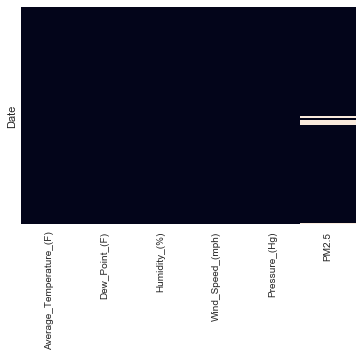

In [24]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [25]:
## Approximately 4% missing values
missing = df['PM2.5'].isnull().sum() / len(df)
print(missing)

0.03723986856516977


In [26]:
## Use interpolation on time method to fill in missing PM2.5 values
df.interpolate(method='time', inplace=True)
df.head()

,Average_Temperature_(F),Dew_Point_(F),Humidity_(%),Wind_Speed_(mph),Pressure_(Hg),PM2.5
Date,,,,,,
2015-01-01,18.5,-8.3,31.0,11.9,30.2,NaN
2015-01-02,21.0,-1.2,40.9,7.2,30.2,54.0
2015-01-03,24.5,7.8,51.5,4.8,30.2,61.0
2015-01-04,35.3,23.1,62.8,4.4,30.0,84.0
2015-01-05,34.5,24.0,69.3,3.4,30.0,98.0


In [27]:
df[df['PM2.5'].isnull()]

,Average_Temperature_(F),Dew_Point_(F),Humidity_(%),Wind_Speed_(mph),Pressure_(Hg),PM2.5
Date,,,,,,
2015-01-01,18.5,-8.3,31.0,11.9,30.2,NaN


In [28]:
## Since PM2.5 value for 2015-01-01 was not filled in with interpolation, it should be backfilled
df.fillna(method='bfill', inplace=True)
df.isnull().sum()

Average_Temperature_(F)    0
Dew_Point_(F)              0
Humidity_(%)               0
Wind_Speed_(mph)           0
Pressure_(Hg)              0
PM2.5                      0
dtype: int64

### Identify Outliers

## 3. Exploratory Data Analysis

To perform time series analysis on our dataset, add year, month, and day columns.

In [29]:
df['Year'] = [d.year for d in df.index]
df['Month'] = [d.month for d in df.index]
df['Day'] = [d.day for d in df.index]
df = df[['Year', 'Month', 'Day', 'Average_Temperature_(F)', 'Dew_Point_(F)', 'Humidity_(%)',
       'Wind_Speed_(mph)', 'Pressure_(Hg)', 'PM2.5']]

df.head()

,Year,Month,Day,Average_Temperature_(F),Dew_Point_(F),Humidity_(%),Wind_Speed_(mph),Pressure_(Hg),PM2.5
Date,,,,,,,,,
2015-01-01,2015,1,1,18.5,-8.3,31.0,11.9,30.2,54.0
2015-01-02,2015,1,2,21.0,-1.2,40.9,7.2,30.2,54.0
2015-01-03,2015,1,3,24.5,7.8,51.5,4.8,30.2,61.0
2015-01-04,2015,1,4,35.3,23.1,62.8,4.4,30.0,84.0
2015-01-05,2015,1,5,34.5,24.0,69.3,3.4,30.0,98.0


### 3.1 PM2.5 AQI trends over time

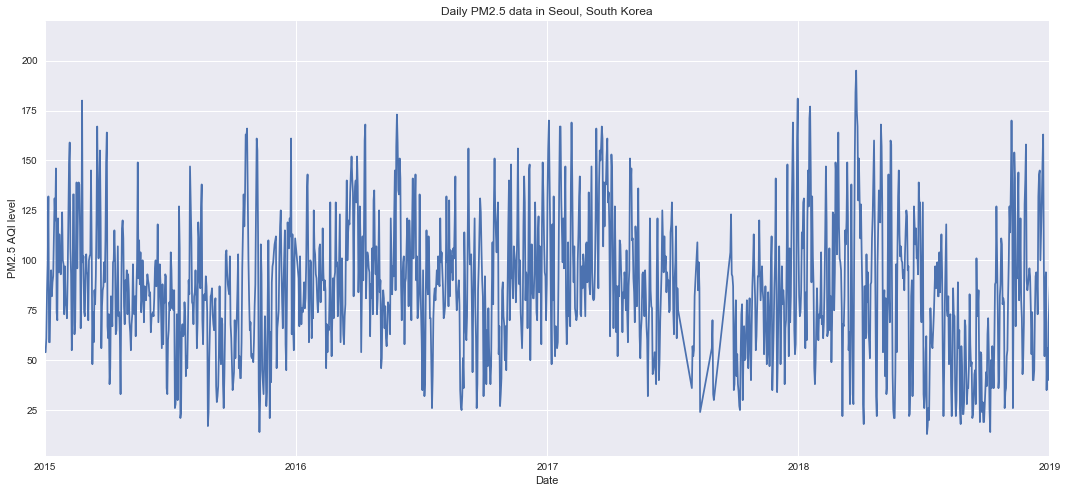

In [30]:
## Plot daily PM2.5 data
pm_plot_data = df['PM2.5']
pm_plot_data.plot(grid=True, figsize=(18,8), title='Daily PM2.5 data in Seoul, South Korea')
plt.xlabel('Date')
plt.xlim(['2015', '2019'])
plt.ylabel('PM2.5 AQI level')
plt.show()

AQI was decloped by the EPA and is used to convey how clean or polluted the air around you is. There are 6 separate AQI levels: Good, Moderate, Unhealthy for Sensitive Groups (USG), Unhealthy, Very Unhealthy, and Hazardous. The thresholds for each category were developed based on established national air quality standards. This scale is used for multiple air pollutants, including PM2.5.

![](AQI_table.png)

Source: https://forum.airnowtech.org/t/aqi-calculations-overview-ozone-pm2-5-and-pm10/168

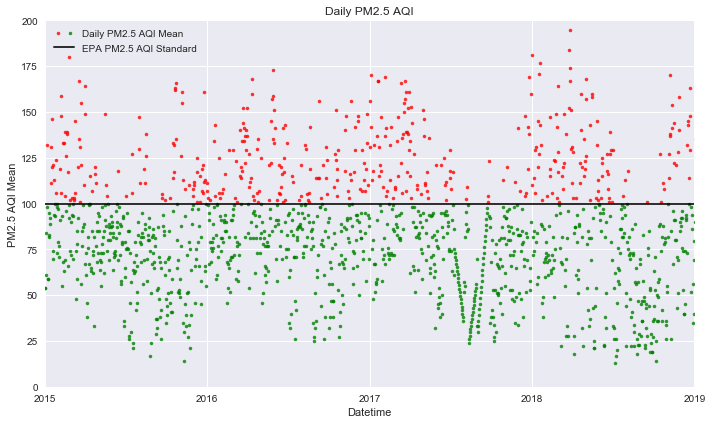

In [31]:
## Plot daily, monthly, and yearly PM2.5 AQI data in comparison 
## to EPA standard

from matplotlib.legend_handler import HandlerTuple

fig, ax = plt.subplots(figsize=(10,6))

# According to EPA, the daily PM2.5 threshold for health standards is at
# 35 ug/m^3, which is 99 AQI when converted. This matches our expectation
# the AQI table (Above 100 is considered unhealthy)
EPA_standard = 100

## Plot daily PM2.5 AQI vs EPA standard
EPA_daily_above = df[df['PM2.5'] > EPA_standard]
EPA_daily_below = df[df['PM2.5'] <= EPA_standard]

daily_red, = ax.plot(EPA_daily_above.index, EPA_daily_above['PM2.5'], color='red', marker='.',linestyle='none', alpha=0.8)
daily_green, = ax.plot(EPA_daily_below.index, EPA_daily_below['PM2.5'], color='green', marker='.',linestyle='none', alpha=0.8)
ax.set_xlim(['2015','2019']);
ax.set_xticks(['2015','2016','2017','2018','2019']);
ax.set_ylim([0,200]);
black = ax.axhline(EPA_standard, linewidth=2, color='black',alpha=0.8, label='EPA PM2.5 AQI Standard') # horizontal line to highlight EPA standard of PM2.5 AQI
ax.legend([(daily_red,daily_green),black],['Daily PM2.5 AQI Mean','EPA PM2.5 AQI Standard'],handler_map={tuple: HandlerTuple(ndivide=None)});
ax.set_xlabel('Datetime');
ax.set_ylabel('PM2.5 AQI Mean')
ax.set_title('Daily PM2.5 AQI')
plt.tight_layout()
plt.show()

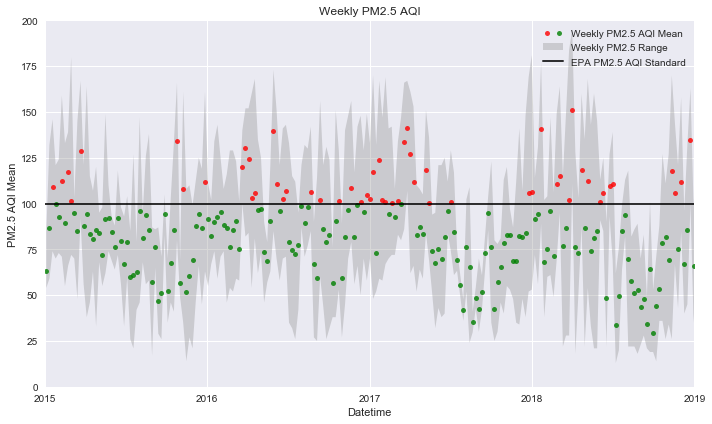

In [32]:
## Plot weekly PM2.5 AQI vs EPA standard (Use resampling)
fig, ax = plt.subplots(figsize=(10,6))

weekly_mean = df.resample('W')['PM2.5'].mean() # extract weekly mean
weekly_max = df.resample('W')['PM2.5'].max() # extract weekly max
weekly_min = df.resample('W')['PM2.5'].min() # extract weekly min
weekly = pd.concat([weekly_mean, weekly_max, weekly_min], axis=1) # concatenate daily mean, max and min for plotting
weekly.columns = ['pm_weekly_mean','pm_weekly_max','pm_weekly_min']

EPA_weekly_above = weekly[weekly['pm_weekly_mean'] > EPA_standard]
EPA_weekly_below = weekly[weekly['pm_weekly_mean'] <= EPA_standard]

weekly_red, = ax.plot(EPA_weekly_above.index, EPA_weekly_above['pm_weekly_mean'], color='red', marker='.', markersize=10, linestyle='none', alpha=0.8)
weekly_green, = ax.plot(EPA_weekly_below.index, EPA_weekly_below['pm_weekly_mean'], color='green', marker='.', markersize=10, linestyle='none', alpha=0.8)
weekly_grey = ax.fill_between(weekly.index, weekly['pm_weekly_max'], weekly['pm_weekly_min'], facecolor='grey',alpha=0.3)
ax.set_xlim(['2015','2019']);
ax.set_xticks(['2015','2016','2017','2018','2019']);
ax.set_ylim([0,200]);
black = ax.axhline(EPA_standard, linewidth=2, color='black',alpha=0.8)
ax.legend([(weekly_red,weekly_green),weekly_grey,black],['Weekly PM2.5 AQI Mean','Weekly PM2.5 Range','EPA PM2.5 AQI Standard'],handler_map={tuple: HandlerTuple(ndivide=None)});
ax.set_xlabel('Datetime');
ax.set_ylabel('PM2.5 AQI Mean')
ax.set_title('Weekly PM2.5 AQI')
plt.tight_layout()
plt.show()

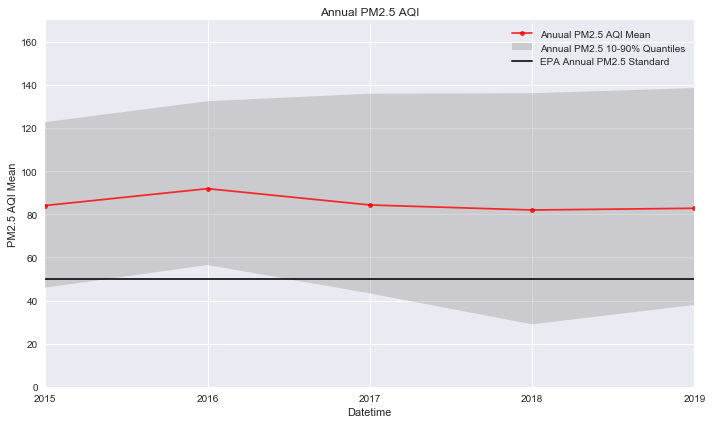

In [33]:
## Plot yearly PM2.5 AQI vs EPA standard (Use resampling)
fig, ax = plt.subplots(figsize=(10,6))

yearly_mean = df.resample('A')['PM2.5'].mean() # annual mean
yearly_90 = df.resample('A')['PM2.5'].quantile(0.9) # annual 90% quantile
yearly_10 = df.resample('A')['PM2.5'].quantile(0.1) # annual 10% quantile
yearly = pd.concat([yearly_mean, yearly_90, yearly_10], axis=1) 
yearly.columns = ['pm_yearly_mean','pm_yearly_90%','pm_yearly_10%']

# According EPA, annual PM2.5 standard is different from daily (12 ug/m^3 => 50 AQI)
EPA_annual_standard = 50

## Plot annual PM2.5 AQI vs EPA standard
yearly_red, = ax.plot(yearly.index, yearly['pm_yearly_mean'], color='red', marker='.', markersize=10, alpha=0.8)
yearly_grey = ax.fill_between(yearly.index, yearly['pm_yearly_90%'], yearly['pm_yearly_10%'], facecolor='grey',alpha=0.3)
ax.set_xlim(['2016','2019']);
ax.set_xticks(yearly.index);
ax.set_ylim([0,170]);
black = ax.axhline(EPA_annual_standard, linewidth=2, color='black',alpha=0.8)
ax.legend([yearly_red,yearly_grey, black],['Anuual PM2.5 AQI Mean','Annual PM2.5 10-90% Quantiles','EPA Annual PM2.5 Standard'])
ax.set_xlabel('Datetime');
ax.set_ylabel('PM2.5 AQI Mean')
ax.set_title('Annual PM2.5 AQI')
plt.tight_layout()
plt.show()

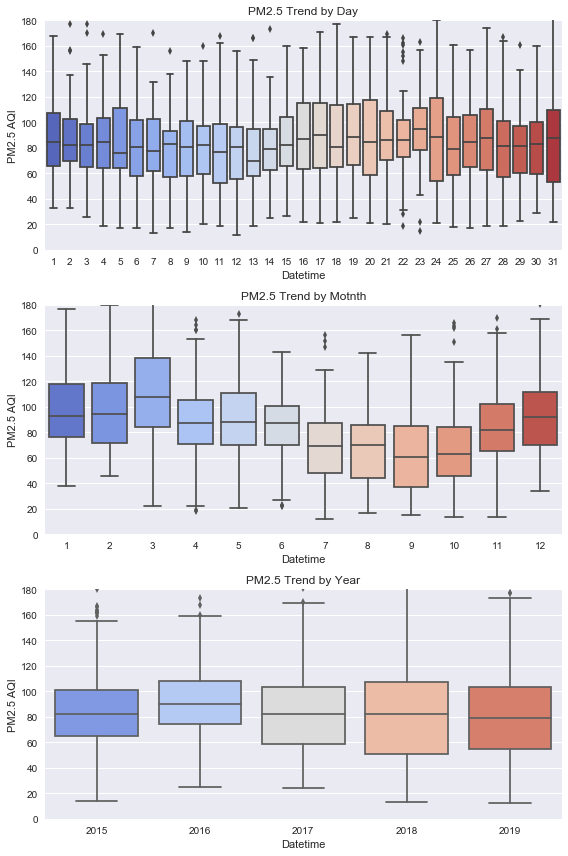

In [34]:
## Plot yearly PM2.5 AQI vs EPA standard (Use resampling)
fig = plt.figure(figsize=(8,12))

ax1 = fig.add_subplot(3,1,1)
sns.boxplot(x='Day',y='PM2.5',data=df,ax=ax1,palette='coolwarm')
#ax1.set_rasterized(True) # set rasterized to True to reduce figure size when saving as svg
plt.ylim([0,180]);
plt.xlabel('Datetime');
plt.ylabel('PM2.5 AQI');
plt.title('PM2.5 Trend by Day')

ax2 = fig.add_subplot(3,1,2)
sns.boxplot(x='Month',y='PM2.5',data=df,ax=ax2,palette='coolwarm')
#ax1.set_rasterized(True) # set rasterized to True to reduce figure size when saving as svg
plt.ylim([0,180]);
plt.xlabel('Datetime');
plt.ylabel('PM2.5 AQI');
plt.title('PM2.5 Trend by Motnth')

ax3 = fig.add_subplot(3,1,3)
sns.boxplot(x='Year',y='PM2.5',data=df,ax=ax3,palette='coolwarm')
#ax1.set_rasterized(True) # set rasterized to True to reduce figure size when saving as svg
plt.ylim([0,180]);
plt.xlabel('Datetime');
plt.ylabel('PM2.5 AQI');
plt.title('PM2.5 Trend by Year')


plt.tight_layout()
plt.show()

## Observations

Daily trend patterns, monthly trend patterns, annual trend patterns, statement of Chi-square test of independence

### 3.2 PM2.5 AQI Correlation to climactic conditions

#### Correlation Matrix

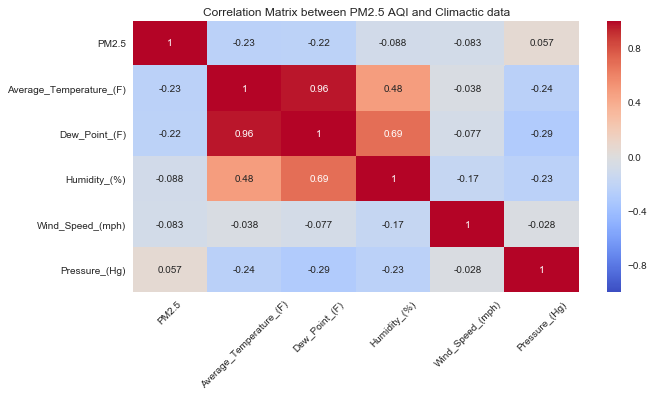

In [35]:
corr_mat = df[['PM2.5', 'Average_Temperature_(F)', 'Dew_Point_(F)',
       'Humidity_(%)', 'Wind_Speed_(mph)', 'Pressure_(Hg)']].corr()
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.title('Correlation Matrix between PM2.5 AQI and Climactic data')

sns.heatmap(corr_mat, vmin=-1, vmax=1, center=0, annot=True, cmap='coolwarm') 
# Red means more positively correlated 
# and Blue means more negatively correlated

plt.show()

As shown, PM2.5 AQI levels are negatively correlated with average temperature, dew point, humidity, and wind Speed while positively correlated (to a minimal degree) with pressure.

#### Correlation between PM2.5 AQI and temperature, dew point, humidity, and pressure

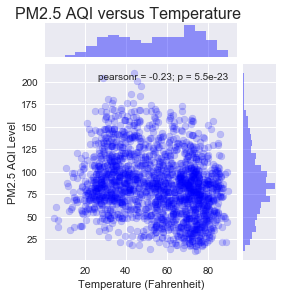

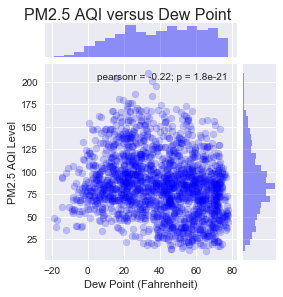

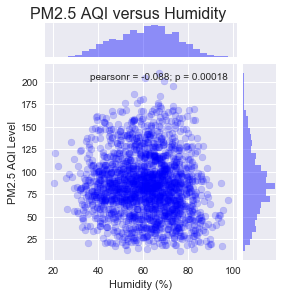

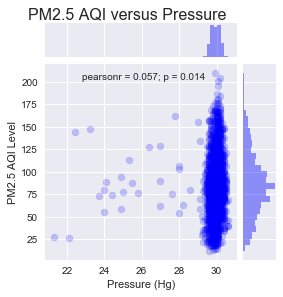

In [36]:
# PM2.5 vs Temperature
g0 = sns.jointplot(x='Average_Temperature_(F)', y='PM2.5', data=df, size=4, color='blue', alpha=0.2, joint_kws=dict(rasterized=True))
g0 = g0.set_axis_labels(xlabel='Temperature (Fahrenheit)', ylabel='PM2.5 AQI Level');
plt.title('PM2.5 AQI versus Temperature',x=-3.5,y=1.2, fontdict=dict(fontsize=16));

# PM2.5 vs Dew Point
g1 = sns.jointplot(x='Dew_Point_(F)', y='PM2.5', data=df, size=4, color='blue', alpha=0.2, joint_kws=dict(rasterized=True)) 
g1 = g1.set_axis_labels(xlabel='Dew Point (Fahrenheit)', ylabel='PM2.5 AQI Level')
plt.title('PM2.5 AQI versus Dew Point',x=-3.5,y=1.2, fontdict=dict(fontsize=16));

# PM2.5 vs Humidity
g3 = sns.jointplot(x='Humidity_(%)', y='PM2.5', data=df, size=4, color='blue', alpha=0.2, joint_kws=dict(rasterized=True)) 
g3 = g3.set_axis_labels(xlabel='Humidity (%)', ylabel='PM2.5 AQI Level')
plt.title('PM2.5 AQI versus Humidity',x=-3.5,y=1.2, fontdict=dict(fontsize=16));

# PM2.5 vs Pressure
g2 = sns.jointplot(x='Pressure_(Hg)', y='PM2.5', data=df, size=4, color='blue', alpha=0.2, joint_kws=dict(rasterized=True)) 
g2 = g2.set_axis_labels(xlabel='Pressure (Hg)', ylabel='PM2.5 AQI Level')
plt.title('PM2.5 AQI versus Pressure',x=-3.5,y=1.2, fontdict=dict(fontsize=16));

<i>Temperature:</i> As suggested by the jointplot and Pearson's correlation value, there is some negative correlation between PM2.5 AQI and temperature. In particular, higher PM2.5 levels are associated with lower temperatures below 50 degrees fahrenheit (cold weather).

<i>Dew Point:</i> Similar to temperature, there is some negative correlation between PM2.5 AQI and dew point temperature. In particular, higher PM2.5 AQI levels are associated with lower dew point temperatures below 40 degrees fahrenheit. This is expected as the correlation matrix illustrates a strong positive correlation between temperature and dew point (0.96).


<i>Humidity:</i> There is a weak negative correlation between PM2.5 AQI and humidity, but still statistically significant. Higher PM2.5 AQI levels are more likely to occur at higher humidity levels. 

<i>Pressure:</i> There is a minimal positive correlation between PM2.5 and pressure, but still statistically significant. As shown above, most of the data points are clustered at the 30 Hg pressure mark with widely varying degrees of PM2.5 AQI levels, which implies no particular relationship, However, observing the few data points in the lower pressure points below 29 Hg, lower PM2.5 levels are associated with lower atmospheric pressure.

#### Correlation between PM2.5 AQI and Wind Speed

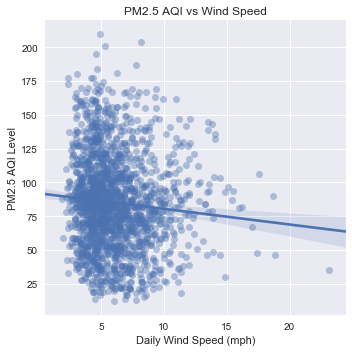

In [37]:
wind_pm = sns.lmplot(x='Wind_Speed_(mph)', y='PM2.5', data=df, 
                     fit_reg=True,scatter_kws=dict(alpha=0.4, 
                     rasterized=True), line_kws=dict(rasterized=True))
wind_pm.set_axis_labels('Daily Wind Speed (mph)', 'PM2.5 AQI Level')
plt.title('PM2.5 AQI vs Wind Speed')
plt.tight_layout()
plt.show()

As shown in the above plot, there is a slight negative correlation between PM2.5 AQI and wind speed, which implies that higher wind speeds help reduce PM2.5 levels.

#### Statistical test of correlation between PM2.5 AQI and climactic conditions

Statistical tests are performed to verify the correlations between PM2.5 AQI and climactic conditions.

To test the perason correlation coefficient between PM2.5 and climactic conditions, scipy.stats.pearsonr() is used. Chi-square test is performed to test independence.

In [38]:
from scipy.stats import pearsonr

for col in ['Average_Temperature_(F)', 'Dew_Point_(F)',
       'Humidity_(%)', 'Wind_Speed_(mph)', 'Pressure_(Hg)']:
    print("{}: {} (r), {} (p-value)".format(col,pearsonr(df[col], df['PM2.5'])[0],pearsonr(df[col], df['PM2.5'])[1])) 

Average_Temperature_(F): -0.2281437261105367 (r), 5.462957199234869e-23 (p-value)
Dew_Point_(F): -0.22009367465232552 (r), 1.8092213767585526e-21 (p-value)
Humidity_(%): -0.08765237849170125 (r), 0.00017669934477730978 (p-value)
Wind_Speed_(mph): -0.08271946486235711 (r), 0.0004025751487793103 (p-value)
Pressure_(Hg): 0.05738574454282479 (r), 0.014185412844822262 (p-value)


## 4. PM2.5 AQI Modeling

### 4.1 Import and Prepare Dataset

In [39]:
# import relevant module

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.preprocessing import StandardScaler #, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [40]:
df_model = df
df_model.head()

## Prepare features X and target variable Y for ML models
X = df_model.drop(['PM2.5'], axis=1)
y = df_model['PM2.5']

### 4.2 Modeling Time Series PM2.5 AQI using ARIMA and SARIMA models

First, time series daily PM2.5 AQI data is modeled without additional climactic data using ARIMA and SARIMA models. The following procedural steps are followed to build ARIMA-based models:

1. Visualize the time series data
2. Perform Dicket-Fuller Stationary test and stationarize the time series if needed
3. Graph ACF and PACF plots to determine optimal parameters for building the ARIMA and SARIMA models
4. Build the model using the time series data from year 2015-2018 (inclusive)
5. Make predictions for year 2019 and evaluate by comparing to the actual observations

#### Plot daily PM2.5 AQI series to inspect characteristics

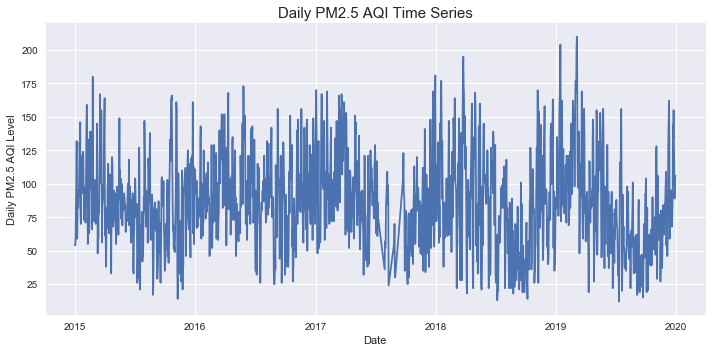

In [41]:
daily_pm = df_model.resample('D')['PM2.5'].mean()

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
daily_pm.plot(ax=ax); # plot hourly pm2.5 for city Beijing
ax.set_ylabel('Daily PM2.5 AQI Level')
ax.set_title('Daily PM2.5 AQI Time Series', fontsize=15)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

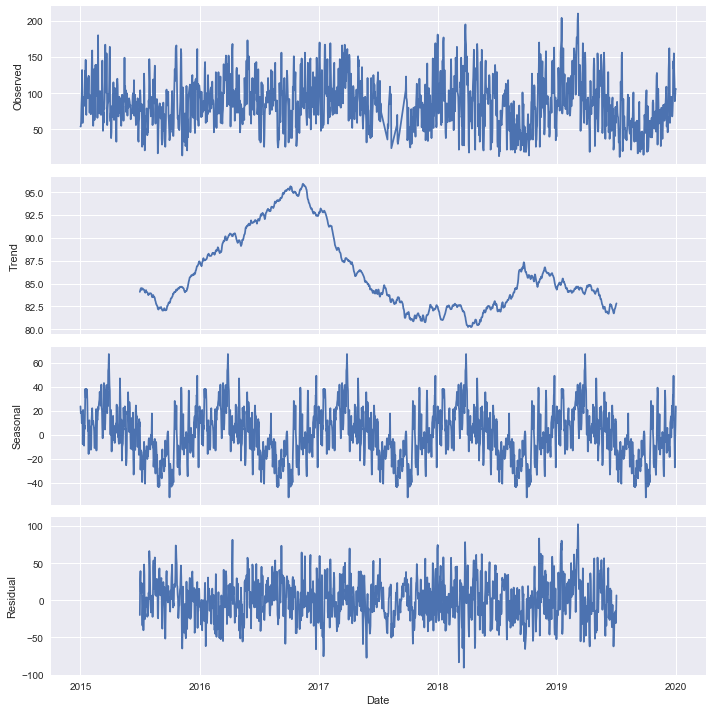

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(daily_pm, model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(10, 10)
plt.tight_layout()
plt.show()

As shown above, there is some trend and seasonality observed in the daily PM2.5 AQI time series data. A stationarity test is necessary before applying the ARIMA-based models.

#### Rolling Statistics and Dickey-Fuller test for stationarity

In order to use the ARIMA-based models, Rolling Statistics and Dickey-Fuller Tests are used to visualize and determine if the daily PM2.5 AQI time series are stationary. Stationarity is defined as data having characteristics of constant mean, variance and autocorrelation across the time series dataset.

* <b>Null Hypothesis (H0)</b>: Time series data is non-stationary 

* <b>Alternative Hypothesis (Ha)</b>: Time series data is stationary

In [43]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

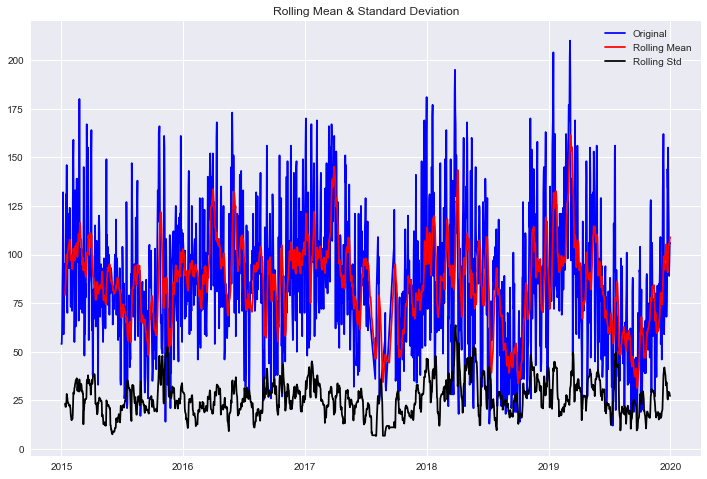

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.415812e+00
p-value                        1.842548e-08
#Lags Used                     1.600000e+01
Number of Observations Used    1.809000e+03
Critical Value (1%)           -3.433970e+00
Critical Value (5%)           -2.863139e+00
Critical Value (10%)          -2.567621e+00
dtype: float64


In [44]:
test_stationarity(daily_pm)

As shown, the p-value is small (0.000013) and therefore, we can reject the null hypothesis of non-stationarity and conclude that the daily PM2.5 AQI data are already stationary. ARIMA and SARIMA models can be used directly without any logarithmic or differencing transformations.

Although the p-value is small, we can reject the null hypothesis of non-stationarity. However, since there was some seasonality and trend observed from above, we can use differencing technique to obtain a more stationary data.

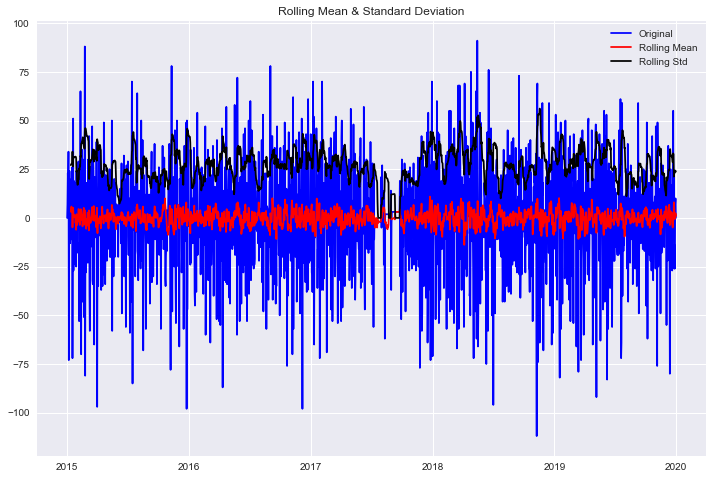

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.549987e+01
p-value                        2.423458e-28
#Lags Used                     2.000000e+01
Number of Observations Used    1.804000e+03
Critical Value (1%)           -3.433980e+00
Critical Value (5%)           -2.863143e+00
Critical Value (10%)          -2.567624e+00
dtype: float64


In [45]:
first_diff = daily_pm - daily_pm.shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)

As you can see, the p-value is significantly more lower than before differencing.

<i>Why is stationarity important?</i> When running a linear regression, the assumption is that all of the observations are all independent of each other. In a time series, however,we know that observations are time dependent. It turns out that a lot of nice results that hold for independent random variables (law of large numbers and central limit theorem to name a couple) hold for stationary random variables. So by making the data stationary, we can actually apply regression techniques to this time dependent variable.

#### Graph ACF and PACF plots to determine the model parameters

Using the differenced daily PM2.5 AQI time series that is stationary, now we need to identify the following model parameters:

1. Number of AR (Auto-Regressive) terms => <b>p</b>
2. Number of I (Integrated or Difference) terms => <b>d</b>
3. Number of MA (Moving Average) terms => <b>a</b>

To determine the values of <b>p</b>, <b>d</b> and <b>a</b>, ACF (Auto-Correlation Function) plot is used to determine <b>a</b>, and PACF (Partial Auto-Correlation Function) plot is used to determine <b>p</b>. <b>d</b> will be 1 since we used first order differencing.

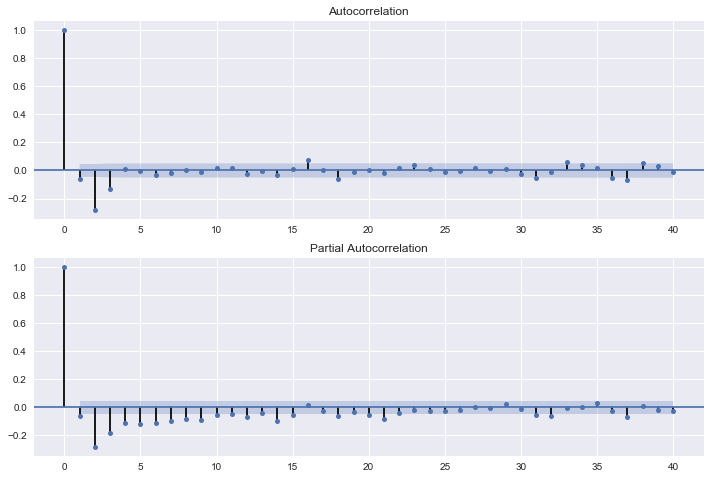

In [46]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=40, ax=ax1) 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=40, ax=ax2)

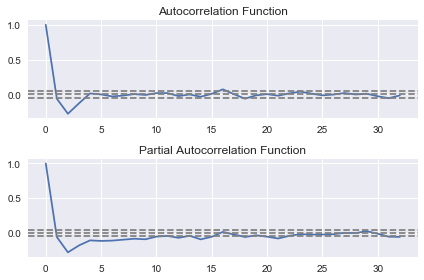

In [47]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(first_diff, nlags=32)
lag_pacf = pacf(first_diff, nlags=32, method='ols')

plt.subplot(211)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(212)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

<b>q</b> parameter can be determined by observing the lay value where ACF chart crosses the upper confidence interval for the first time. In our case, <b>q</b> is around 1.

<b>p</b> parameter can be determined by observing the lay value where PACF chart crosses the upper confidence interval for the first time. In our case, <b>p</b> is around 1.

Now that we have estimated all parameter values, we can not create an ARIMA model. 

#### Build ARIMA and SARIMA models and make predictions

The hourly and daily PM2.5 AQI data are first splitted into train and test sets by year, and ARIMA models are constructed and optimized using the parameters identified from the ACF and PACF plots. In addition, SARIMA model is also contructed to model the daily PM2.5 data to better address for the seasonal component observed in the time series.

In [48]:
# train test split for daily PM2.5 AQI data
pm_daily_train = first_diff.loc['2015':'2018']
pm_daily_test = first_diff.loc['2019']
print(len(pm_daily_train),len(pm_daily_test))

1460 365


In [49]:
# define function for evaluating the performance of an ARIMA model with given parameters (p,d,q)
def evaluate_arima(X, p, d, q):
    """Evaluate an ARIMA model with given parameters (p,d,q) and return the mean-squared-error (MSE) performance """
    
    # divide X into training and validation datasets
    train_size = int(len(X) * 0.9)
    train, val = X[0:train_size], X[train_size:]
    
    # build the model and make predictions on the validation set
    arima = ARIMA(X[:(train_size)], order=(p,d,q))
    model_fit = arima.fit()  
    prediction = model_fit.forecast(steps=len(val))[0]
        
    # compute out of sample mean-squared-error
    mse = mean_squared_error(val, prediction) 
    return mse

# define functions for performing the grid search and identifying the optimal parameters
def grid_search_arima(X, ps, ds, qs):
    mse_best = float("inf")
    p_best, d_best, q_best = None, None, None
    for p in ps:
        for d in ds:
            for q in qs:
                try:
                    # call the evalue_arima function for model build and perform evaluation
                    mse = evaluate_arima(X, p, d, q) 
                    print('ARIMA p={}, d={}, q={}, MSE={:.2f}'.format(p, d, q, mse))
                    if mse < mse_best:
                        mse_best, p_best, d_best, q_best = mse, p, d, q
                except:
                    continue
    print('Best parameters are p={}, d={}, q={}, the corresponding MSE is {:.2f}'.format(p_best, d_best, q_best, mse_best))
    return p_best, d_best, q_best

In [50]:
# grid search for optimal parameter

ps, ds, qs = [0,1,2], [1], [0,1,2] # use the potential q, d, q values identified from ACF and PACF Plots
p, d, q = grid_search_arima(pm_daily_train, ps, ds, qs)

ARIMA p=0, d=1, q=0, MSE=937.46
ARIMA p=0, d=1, q=1, MSE=824.04
ARIMA p=0, d=1, q=2, MSE=823.36
ARIMA p=1, d=1, q=0, MSE=865.53
ARIMA p=2, d=1, q=0, MSE=841.17
Best parameters are p=0, d=1, q=2, the corresponding MSE is 823.36


                             ARIMA Model Results                              
Dep. Variable:                D.PM2.5   No. Observations:                 1459
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -6904.382
Method:                       css-mle   S.D. of innovations             27.404
Date:                Mon, 17 Feb 2020   AIC                          13816.764
Time:                        23:51:21   BIC                          13837.906
Sample:                    01-03-2015   HQIC                         13824.651
                         - 12-31-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0001      0.001     -0.107      0.915      -0.003       0.003
ma.L1.D.PM2.5    -1.1847      0.046    -25.808      0.000      -1.275      -1.095
ma.L2.D.PM2.5     0.1847      0.046     

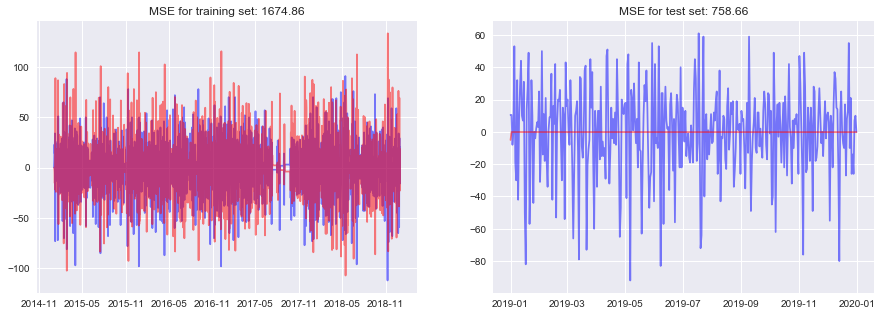

In [51]:
# construct ARIMA model using optimized parameters p, d, q
arima = ARIMA(pm_daily_train, order=(0,1,2))
arima_fit = arima.fit()
prediction = pd.Series(arima_fit.forecast(steps=len(pm_daily_test))[0])
prediction.index = pm_daily_test.index
print(arima_fit.summary())

# plot the results for comparison
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121) # plot the training set
ax1.plot(pm_daily_train, color='blue', alpha=0.5);
ax1.plot(arima_fit.fittedvalues, color='red',alpha=0.5);
ax1.set_title('MSE for training set: {:.2f}'.format(mean_squared_error(pm_daily_train[1:], arima_fit.fittedvalues)));
ax2 = fig.add_subplot(122) # plot the test set
ax2.plot(pm_daily_test, color='blue',alpha=0.5);
ax2.plot(prediction, color='red',alpha=0.5);
ax2.set_title('MSE for test set: {:.2f}'.format(mean_squared_error(pm_daily_test, prediction)));

# compare the first 15 predicted values
comparison = pd.DataFrame({'actual':pm_daily_test,'predict':prediction})
print(comparison.head(15))

#### SARIMA model for daily PM2.5 AQI data

Before, our decomposition with a frequency of one-year revealed a pronounced seasonality, confirming the seasonal component observed in the above ACF plot.

In [52]:
# use p=1, d=0, q=1 and P=0, D=1, Q=0, s=365 for constructing the Seasonal ARIMA model based on all the above analysis
# sarima = SARIMAX(pm_daily_train, order=(1,1,0), seasonal_order=(1,1,0,365))
# sarima_fit = sarima.fit()
# print(sarima_fit.summary());
# #sarima_fit.plot_diagnostics(figsize=(16,10));
# prediction = pd.Series(sarima_fit.forecast(steps=len(pm_daily_test)))
# prediction.index = pm_daily_test.index

# # plot the results for comparison
# fig = plt.figure(figsize=(15,5))
# ax1 = fig.add_subplot(121) # plot the training set
# ax1.plot(pm_daily_train, color='blue', alpha=0.5);
# ax1.plot(sarima_fit.fittedvalues, color='red',alpha=0.5);
# ax1.set_title('MSE for training set: {:.2f}'.format(mean_squared_error(pm_daily_train, sarima_fit.fittedvalues)));
# ax2 = fig.add_subplot(122) # plot the test set
# ax2.plot(pm_daily_test, color='blue',alpha=0.5);
# ax2.plot(prediction, color='red',alpha=0.5);
# ax2.set_title('MSE for test set: {:.2f}'.format(mean_squared_error(pm_daily_test, prediction)));

# # compare the first 15 predicted values
# comparison = pd.DataFrame({'actual':pm_daily_test,'predict':prediction})
# print(comparison.head(15))

#### Section Summary
Time series PM2.5 AQI data was predicted using ARIMA model and the result shows that

* The results show that ARIMA models with various combinations of $p$, $d$, $q$ parameters share very similar performances, with acceptable mean-squared-error on the training set, good precision for the very first out-of-sample prediction into the future, but poor predictions for further steps into the future.
* In addition, SARIMA model is also carried out for the time series PM2.5 data with a daily frequency to further account for the observed seasonal component (yearly). Again, the SARIMA model only provides a reasonable prediction for the very first data point into the future, but fails to predict further steps.
* This suggests that the autoregressive and moving average patterns in the time series alone are not enough to predict multiple steps into the future. There are other underlying factors causing non-repetitive changes in PM2.5 values.

## 5. Machine learning models by considering climactic condition features

In [54]:
# train test split by year, using data of year 2010-2014 as training set and data of year 2015 as test set

X_train = X[X['Year'] != 2019]
y_train = y[X['Year'] != 2019]
print(len(X_train), len(y_train))

X_test = X[X['Year'] == 2019]
y_test = y[X['Year'] == 2019]
print(len(X_test),len(y_test))

1461 1461
365 365


In [55]:
# initialize a score table to log the performance of various algorithms
index = ['LinearRegression','Lasso','Ridge','RandomForestRegressor','GradientBoostingRegressor','KNeighborsRegressor','MLPRegressor']
score_table_1 = pd.DataFrame(index = index, columns= ['r2_train','r2_test','mse_train','mse_test'])

In [61]:
# define function for plotting the results
def compute_plot_result(algo, pred_train, pred_test):
    """compute, log and plot the performance for both training and test sets"""
    
    # compute the performance
    r2_train = r2_score(y_train, pred_train)
    r2_test = r2_score(y_test, pred_test)
    mse_train = mean_squared_error(y_train, pred_train)
    mse_test = mean_squared_error(y_test, pred_test)
    
    # log the performance
    score_table_1.loc[algo,:] = r2_train, r2_test, mse_train, mse_test
    
    # plot the predicted values vs actual for both training and test sets
    fig = plt.figure(figsize=(18,5))

    ax1 = fig.add_subplot(121) # plot training set vs prediction
    ax1.plot(X_train.index, y_train, color='blue',alpha=0.5);
    ax1.plot(X_train.index, pred_train, color='red',alpha=0.5);
    ax1.set_xlim([X_train.index[0],X_train.index[100]]); # zoom in on the first 100 points to compare the detailed features 
    ax1.set_xlabel('First 100 points of the training set');
    ax1.set_ylabel('Daily PM2.5 AQI Level');
    ax1.legend(['actual','predicted']);
    ax1.set_title('Training set: R2={:.2f}, MSE={:.2f}'.format(r2_train, mse_train));

    ax2 = fig.add_subplot(122) # plot test set vs prediction
    ax2.plot(X_test.index, y_test, color='blue',alpha=0.5);
    ax2.plot(X_test.index, pred_test, color='red',alpha=0.5);
    ax2.set_xlim([X_test.index[-100],X_test.index[-1]]); # zoom in on the last 100 points to compare the detailed features
    ax2.set_xlabel('Last 100 points of the test set');
    ax2.set_ylabel('Daily PM2.5 AQI Level');
    ax2.legend(['actual','predicted']);
    ax2.set_title('Test set: R2={:.2f}, MSE={:.2f}'.format(r2_test, mse_test));

### Linear models

                   feature  coefficient
3  Average_Temperature_(F)    63.563642
5             Humidity_(%)    28.987732
2                      Day     2.257206
7            Pressure_(Hg)    -0.844284
0                     Year    -0.913294
6         Wind_Speed_(mph)    -2.775310
1                    Month    -6.401565
4            Dew_Point_(F)   -85.261257


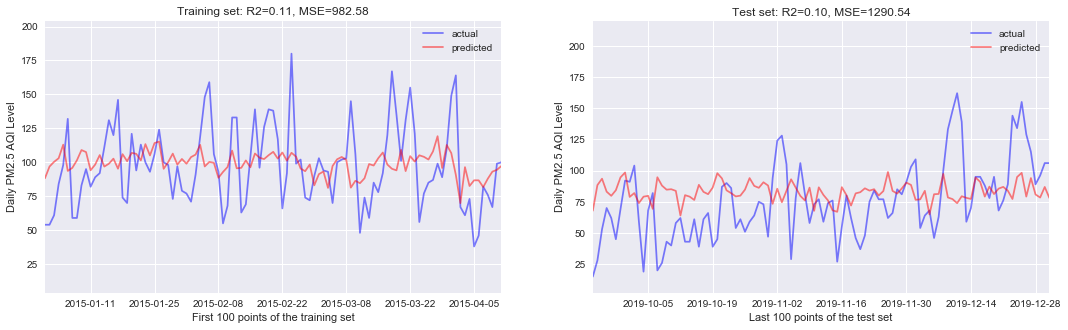

In [62]:
# Simple LinearRegression model

linreg = Pipeline([('scaler', StandardScaler()),('linreg',LinearRegression())])
linreg.fit(X_train, y_train)
pred_train = linreg.predict(X_train)
pred_test = linreg.predict(X_test)

# print feature importance
feature_rank = pd.DataFrame({'feature':X_train.columns, 'coefficient':linreg.named_steps.linreg.coef_})
print(feature_rank.sort_values('coefficient',ascending=False))

compute_plot_result('LinearRegression', pred_train, pred_test)

Best parameters: {'lasso__alpha': 0.9500000000000001}
Corresponding R2 score: -0.01682903593375296
                   feature  coefficient
5             Humidity_(%)     2.919124
2                      Day     1.700306
7            Pressure_(Hg)     0.192992
4            Dew_Point_(F)    -0.000000
0                     Year    -1.137985
6         Wind_Speed_(mph)    -2.558692
3  Average_Temperature_(F)    -5.280322
1                    Month    -6.199431


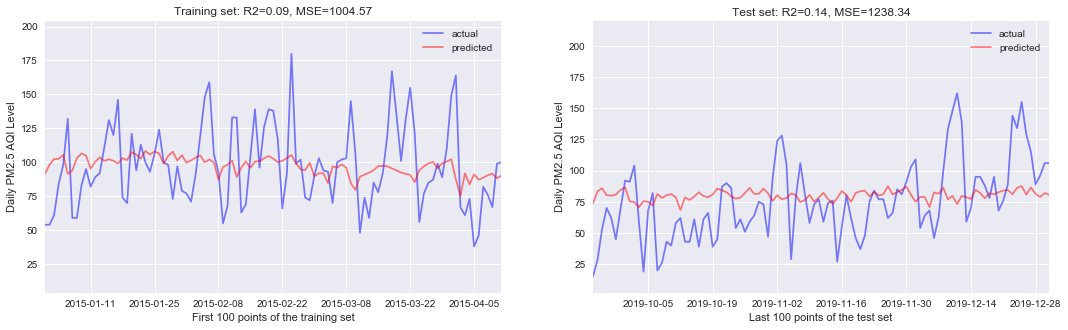

In [63]:
# LASSO model

# initialize a Lasso model with default parameters
lasso= Pipeline([('scaler', StandardScaler()),('lasso',Lasso())])

# grid search of parameter alpha to improve lasso model
parameters = {'lasso__alpha': np.arange(0.05, 1, 0.05)}
lasso_cv = GridSearchCV(lasso, parameters, scoring='r2',cv=3)
lasso_cv.fit(X_train, y_train)
print('Best parameters:', lasso_cv.best_params_)
print('Corresponding R2 score:', lasso_cv.best_score_)

# update model with the best parameters
lasso = Pipeline([('scaler', StandardScaler()),('lasso', Lasso(alpha=0.65))])
lasso.fit(X_train, y_train)
pred_train = lasso.predict(X_train)
pred_test = lasso.predict(X_test)

# print feature ranking
feature_rank = pd.DataFrame({'feature':X_train.columns, 'coefficient':lasso.named_steps.lasso.coef_})
print(feature_rank.sort_values('coefficient',ascending=False))

compute_plot_result('Lasso', pred_train, pred_test)

Best parameters: {'ridge__alpha': 7000}
Corresponding R2 score: -0.0031085074666145447
                   feature  coefficient
7            Pressure_(Hg)     0.398671
2                      Day     0.365025
5             Humidity_(%)     0.136189
0                     Year    -0.236601
6         Wind_Speed_(mph)    -0.425444
4            Dew_Point_(F)    -0.637919
3  Average_Temperature_(F)    -0.758182
1                    Month    -1.022350


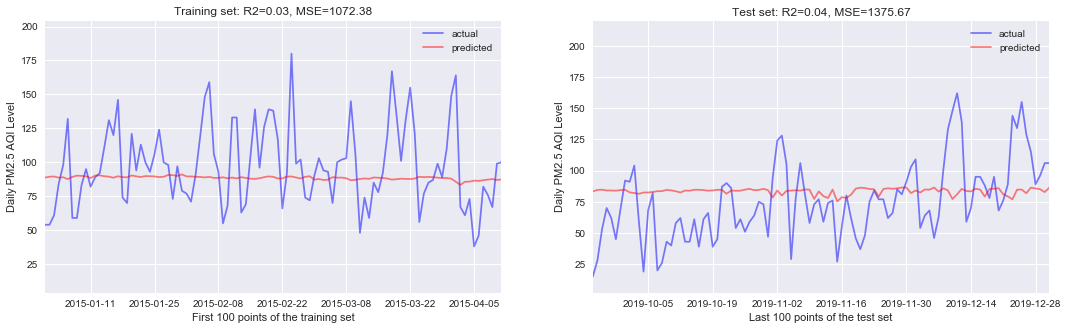

In [64]:
# Ridge model

# initialize a Ridge model with default parameters
ridge = Pipeline([('scaler', StandardScaler()),('ridge',Ridge())])

# grid search of parameter alpha to improve lasso model
parameters = {'ridge__alpha': np.arange(7000, 9000, 100)}
ridge_cv = GridSearchCV(ridge, parameters, scoring='r2',cv=3)
ridge_cv.fit(X_train, y_train)
print('Best parameters:', ridge_cv.best_params_)
print('Corresponding R2 score:', ridge_cv.best_score_)

# update model with the best parameters
ridge = Pipeline([('scaler', StandardScaler()),('ridge',Ridge(alpha=8200))])
ridge.fit(X_train, y_train)
pred_train = ridge.predict(X_train)
pred_test = ridge.predict(X_test)

# print feature ranking
feature_rank = pd.DataFrame({'feature':X_train.columns, 'coefficient':ridge.named_steps.ridge.coef_})
print(feature_rank.sort_values('coefficient',ascending=False))

compute_plot_result('Ridge', pred_train, pred_test)

### RandomForestRegressor model

In [65]:
# Initialize a RandomForestRegressor model with default parameters
rfr = Pipeline([('scaler', StandardScaler()),('rfr',RandomForestRegressor())])

# Grid search of parameters n_estimators and max_features to improve RandomForestRegressor model
parameters = {'rfr__n_estimators': np.arange(100,160,10), 'rfr__max_features':['auto','sqrt','log2']}
rfr_cv = GridSearchCV(rfr, parameters, scoring='r2',cv=3)
rfr_cv.fit(X_train, y_train)
print('Best parameters:', rfr_cv.best_params_)
print('Corresponding R2 score:', rfr_cv.best_score_)

Best parameters: {'rfr__max_features': 'sqrt', 'rfr__n_estimators': 140}
Corresponding R2 score: 0.13001455052064692


                   feature  importance
3  Average_Temperature_(F)    0.172277
4            Dew_Point_(F)    0.152324
5             Humidity_(%)    0.146857
1                    Month    0.140249
2                      Day    0.124978
6         Wind_Speed_(mph)    0.122055
7            Pressure_(Hg)    0.073913
0                     Year    0.067347


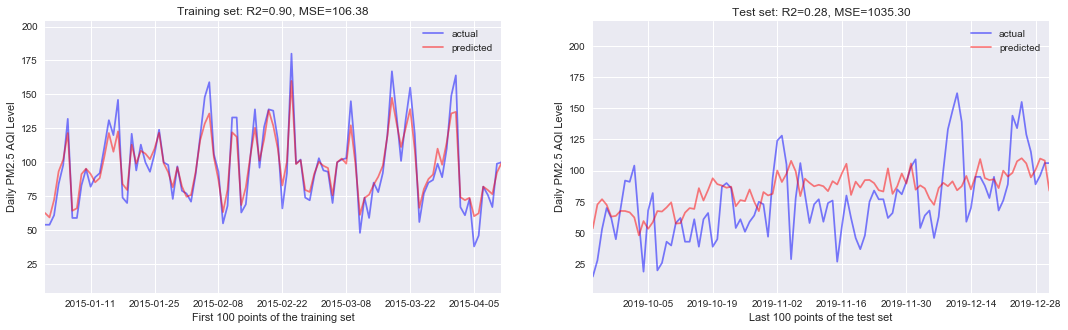

In [66]:
# update model with best parameters
rfr = Pipeline([('scaler', StandardScaler()),('rfr', RandomForestRegressor(n_estimators=150, max_features='log2', n_jobs=2))])
rfr.fit(X_train, y_train)
pred_train = rfr.predict(X_train)
pred_test = rfr.predict(X_test)

# print feature importance
feature_rank = pd.DataFrame({'feature': X_train.columns, 'importance': rfr.named_steps.rfr.feature_importances_})
print(feature_rank.sort_values(by='importance',ascending=False))

compute_plot_result("RandomForestRegressor", pred_train, pred_test)

### GradientBoostingRegressor model

In [67]:
# Initialize a GradientBoostREgressor model with default parameters
gbr = Pipeline([('scaler', StandardScaler()),('gbr',GradientBoostingRegressor())])

# Grid search of parameter n_estimators, max_features, max_depth, learning_rate to improve GradientBoostingRegressor model
parameters = {'gbr__n_estimators': np.arange(50,300,50), 'gbr__learning_rate': [0.01, 0.05, 0.1, 0.15],'gbr__max_features':['auto','sqrt','log2'],'gbr__max_depth': np.arange(4,9,2)}
gbr_cv = GridSearchCV(gbr, parameters, scoring='r2',cv=3)
gbr_cv.fit(X_train, y_train)
print('Best parameters:', gbr_cv.best_params_)
print('Corresponding R2 score:', gbr_cv.best_score_)

Best parameters: {'gbr__learning_rate': 0.05, 'gbr__max_depth': 4, 'gbr__max_features': 'sqrt', 'gbr__n_estimators': 100}
Corresponding R2 score: 0.14869414079539786


                   feature  importance
3  Average_Temperature_(F)    0.173372
4            Dew_Point_(F)    0.158626
1                    Month    0.151880
5             Humidity_(%)    0.145448
2                      Day    0.119048
6         Wind_Speed_(mph)    0.113802
7            Pressure_(Hg)    0.073127
0                     Year    0.064698


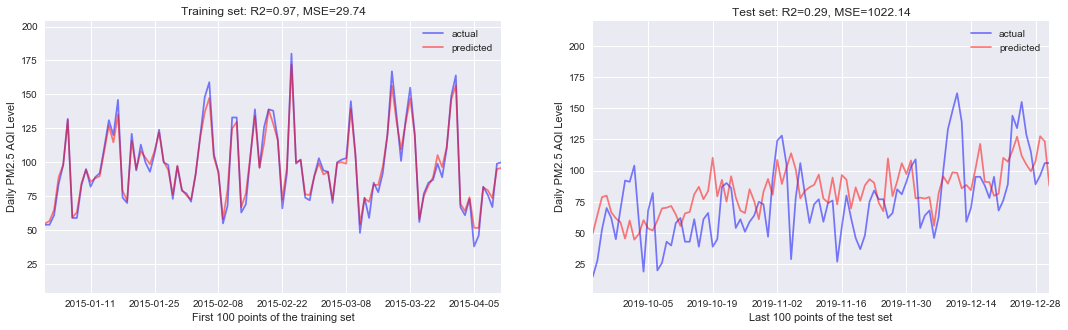

In [68]:
# Update model with best parameters
gbr = Pipeline([('scaler', StandardScaler()),
                  ('gbr', GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_features='log2', max_depth=8))])
gbr.fit(X_train, y_train)
pred_train = gbr.predict(X_train)
pred_test = gbr.predict(X_test)

# Print feature importance
feature_rank = pd.DataFrame({'feature': X_train.columns, 'importance': gbr.named_steps.gbr.feature_importances_})
print(feature_rank.sort_values(by='importance',ascending=False))

compute_plot_result("GradientBoostingRegressor", pred_train, pred_test)

### KNeighborsRegressor model

In [69]:
# Initialize a KNeightborsRegressor model using default parameters
knr = Pipeline([('scaler', StandardScaler()),('knr',KNeighborsRegressor())])

# Grid search of parameters n_neighbors, weights to improve KNeighborsRegressor model
parameters = {'knr__n_neighbors': np.arange(70,120,10),'knr__weights':['distance','uniform']}
knr_cv = GridSearchCV(knr, parameters, scoring='r2',cv=3)
knr_cv.fit(X_train, y_train)
print('Best parameters:', knr_cv.best_params_)
print('Corresponding R2 score:', knr_cv.best_score_)

Best parameters: {'knr__n_neighbors': 110, 'knr__weights': 'distance'}
Corresponding R2 score: 0.042328330758648544


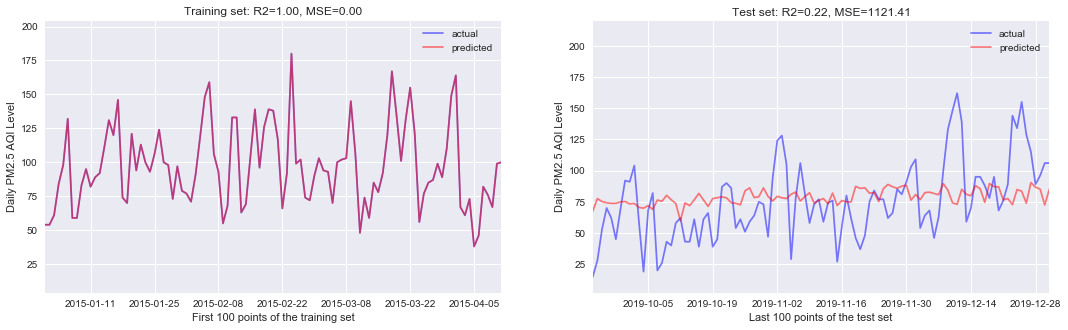

In [70]:
# Update model with the best parameters
knr = Pipeline([('scaler', StandardScaler()),('knr',KNeighborsRegressor(n_neighbors=100, weights='distance'))])
knr.fit(X_train, y_train)
pred_train = knr.predict(X_train)
pred_test = knr.predict(X_test)

compute_plot_result("KNeighborsRegressor", pred_train, pred_test)

### MLPRegressor model

In [71]:
# Initialize a MLPRegressor model using default parameters
mlpr = Pipeline([('scaler', StandardScaler()),('mlpr',MLPRegressor())])

# Grid search of parameters hidden_layer_sizes, activation to improve MLPRegressor model
parameters = {'mlpr__activation': ['identity','logistic','tanh','relu'],'mlpr__hidden_layer_sizes':[(100,),(100,10),(100,100),(100,100,10)]}
mlpr_cv = GridSearchCV(mlpr, parameters, scoring='r2',cv=3)
mlpr_cv.fit(X_train, y_train)
print('Best parameters:', mlpr_cv.best_params_)
print('Corresponding R2 score:', mlpr_cv.best_score_)

Best parameters: {'mlpr__activation': 'tanh', 'mlpr__hidden_layer_sizes': (100,)}
Corresponding R2 score: 0.005436125826949523


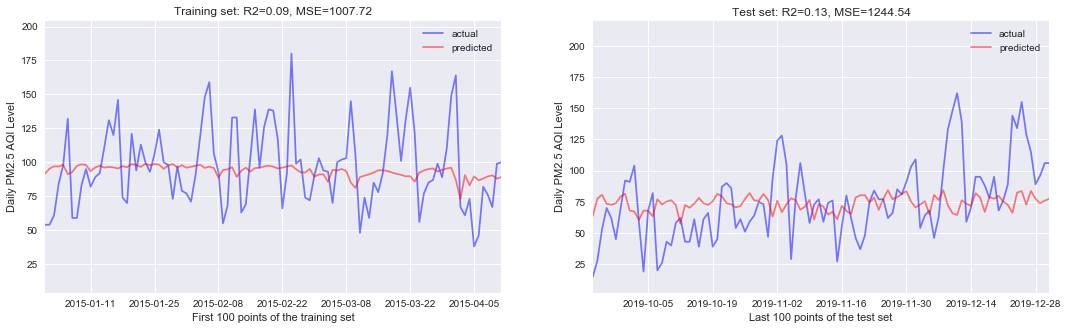

In [72]:
# Update model with the best parameters
mlpr = Pipeline([('scaler', StandardScaler()),('mlpr',MLPRegressor(hidden_layer_sizes=(100,), activation='logistic'))])
mlpr.fit(X_train, y_train)
pred_train = mlpr.predict(X_train)
pred_test = mlpr.predict(X_test)

compute_plot_result("MLPRegressor", pred_train, pred_test)

### Model comparison

In [73]:
print(score_table_1)

                            r2_train   r2_test mse_train mse_test
LinearRegression            0.111397  0.102496   982.583  1290.54
Lasso                      0.0915092  0.138802   1004.57  1238.34
Ridge                      0.0301899  0.043291   1072.38  1375.67
RandomForestRegressor       0.903793  0.280003   106.382   1035.3
GradientBoostingRegressor   0.973101  0.289152   29.7443  1022.14
KNeighborsRegressor                1  0.220118         0  1121.41
MLPRegressor                0.088666  0.134489   1007.72  1244.54


### Section Summary

ML models are constructed by utilizing available climactic data (temperature, pressure, dew point, wind speed):

* Here, the datetime information is represented as year, month and day, and used as features along with the climactic data. Data between year 2015-2018 are used as training set, and data in year 2019 is used as the test set.
* Various machine learning models are constructed following this methodology. Simpler linear models (LinearRegression, Lasso and Ridge) only achieves at most $R^2$=0.13 on the test set. Among more advanced models, KNeighborsRegressor gives $R^2$ of 0.22; ensemble methods, like RandomForestRegressor and GradientBoostingRegressor, achieve $R^2$ of 0.28; In addition, nueral-net based MLPRegressor is also tried out with a reported $R^2$ of 0.13.
* These suggest that although time-related information and weather conditions can only explain the variations in air quality (PM2.5 value) to a limited extent. There are other underlying reasons causing the PM2.5 trends and variations.

## 6. Machine learning models with additional feature engineering for time series

Here, an additional lag feature of 1 hour (value from the previous one step) is introduced. Given that the PM2.5 values is a hourly time series and entries from previous steps will impact later entries to some extent, the introduce of new lag feature will enable this autoregressive impact.

As shown below, in this particular problem, it’s very useful to include the lag features from previous step for predicting the value for the next step, the R2 scores after adding lag features are boosted significantly.

In [85]:
# add lag features by adding the PM2.5 AQI value from the previous step (previous day)
df['PM2.5_day_lag'] = df['PM2.5'].shift(1)
df.dropna(inplace=True)

X_2 = df.drop(['PM2.5'], axis=1) 
y_2 = df['PM2.5']

In [86]:
# train test split by year and city

X_2_train = X_2[(X_2['Year'] != 2019)]
y_2_train = y_2[(X_2['Year'] != 2019)] 
X_2_test = X_2[(X_2['Year'] == 2019)]
y_2_test = y_2[(X_2['Year'] == 2019)]

print(len(X_2_train), len(y_2_train))
print(len(X_2_test),len(y_2_test))

1460 1460
365 365


In [88]:
# initialize a score table to log the performance of various algorithms
index = ['LinearRegression','Lasso','Ridge','RandomForestRegressor','GradientBoostingRegressor','KNeighborsRegressor','MLPRegressor']
score_table_2 = pd.DataFrame(index = index, columns= ['r2_train','r2_test','mse_train','mse_test'])

In [91]:
# define function for plotting the results of algorithms with additional lag feature
def compute_plot_result_2(algo, pred_train, pred_test):
    """compute, log and plot the performance for both training and test sets"""
    
    # compute the performance
    r2_train = r2_score(y_2_train, pred_train)
    r2_test = r2_score(y_2_test, pred_test)
    mse_train = mean_squared_error(y_2_train, pred_train)
    mse_test = mean_squared_error(y_2_test, pred_test)
    
    # log the performance
    score_table_2.loc[algo,:] = r2_train, r2_test, mse_train, mse_test
    
    # plot the predicted values vs actual for both training and test sets
    fig = plt.figure(figsize=(18,5))

    ax1 = fig.add_subplot(121) # plot training set vs prediction
    ax1.plot(X_2_train.index, y_2_train, color='blue',alpha=0.5);
    ax1.plot(X_2_train.index, pred_train, color='red',alpha=0.5);
    ax1.set_xlim([X_2_train.index[0],X_2_train.index[100]]); 
    ax1.set_xlabel('First 100 points of the training set');
    ax1.set_ylabel('Daily PM2.5 AQI Level');
    ax1.legend(['actual','predicted']);
    ax1.set_title('Training set: R2={:.2f}, MSE={:.2f}'.format(r2_train, mse_train));

    ax2 = fig.add_subplot(122) # plot test set vs prediction
    ax2.plot(X_2_test.index, y_2_test, color='blue',alpha=0.5);
    ax2.plot(X_2_test.index, pred_test, color='red',alpha=0.5);
    ax2.set_xlim([X_2_test.index[-100],X_2_test.index[-1]]); 
    ax2.set_xlabel('Last 100 points of the test set');
    ax2.set_ylabel('Daily PM2.5 level (ug/$m^3$)');
    ax2.legend(['actual','predicted']);
    ax2.set_title('Test set: R2={:.2f}, MSE={:.2f}'.format(r2_test, mse_test));

### Linear models with the new lag feature

                   feature  coefficient
3  Average_Temperature_(F)    29.201367
8            PM2.5_day_lag    20.708029
5             Humidity_(%)    14.810126
2                      Day     0.921828
7            Pressure_(Hg)     0.380857
0                     Year    -0.417689
1                    Month    -2.991358
6         Wind_Speed_(mph)    -3.141992
4            Dew_Point_(F)   -38.722441


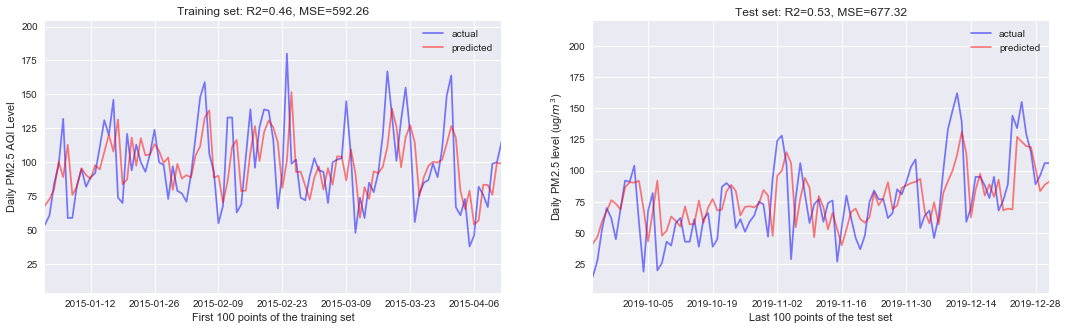

In [92]:
# Simple LinearRegression model with the new lag feature

linreg_2 = Pipeline([('scaler', StandardScaler()),('linreg',LinearRegression())])
linreg_2.fit(X_2_train, y_2_train)
pred_train = linreg_2.predict(X_2_train)
pred_test = linreg_2.predict(X_2_test)

feature_rank = pd.DataFrame({'feature':X_2_train.columns, 'coefficient':linreg_2.named_steps.linreg.coef_})
print(feature_rank.sort_values('coefficient',ascending=False))

compute_plot_result_2('LinearRegression', pred_train, pred_test)

Best parameters: {'lasso__alpha': 0.07499999999999998}
Corresponding R2 score: 0.42581250336186494
                   feature  coefficient
8            PM2.5_day_lag    20.883315
5             Humidity_(%)     4.416064
7            Pressure_(Hg)     0.906891
2                      Day     0.890665
3  Average_Temperature_(F)     0.000000
0                     Year    -0.752791
4            Dew_Point_(F)    -3.082062
1                    Month    -3.146418
6         Wind_Speed_(mph)    -3.229903


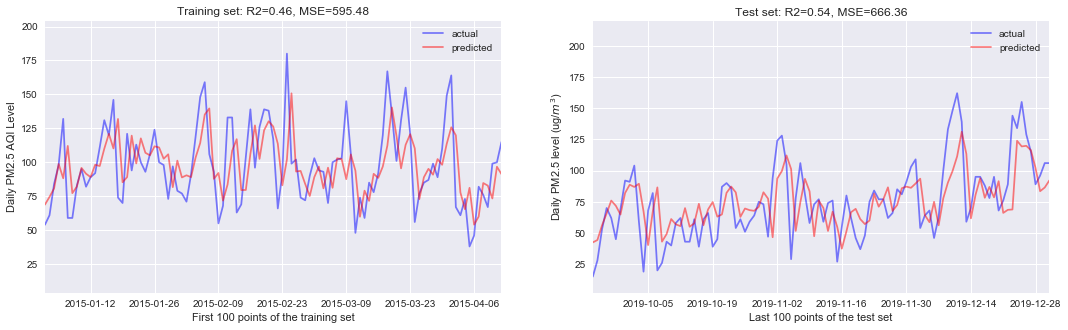

In [93]:
# LASSO model with the new lag feature

# initialize a Lasso model with default parameters
lasso_2= Pipeline([('scaler', StandardScaler()),('lasso',Lasso())])

# grid search of parameter alpha to improve lasso model
parameters = {'lasso__alpha': np.arange(0.03,0.08,0.005)}
lasso_2_cv = GridSearchCV(lasso_2, parameters, scoring='r2',cv=3)
lasso_2_cv.fit(X_2_train, y_2_train)
print('Best parameters:', lasso_2_cv.best_params_)
print('Corresponding R2 score:', lasso_2_cv.best_score_)

# update model with the best parameters
lasso_2 = Pipeline([('scaler', StandardScaler()),('lasso', Lasso(alpha=0.05))])
lasso_2.fit(X_2_train, y_2_train)
pred_train = lasso_2.predict(X_2_train)
pred_test = lasso_2.predict(X_2_test)

# print feature ranking
feature_rank = pd.DataFrame({'feature':X_2_train.columns, 'coefficient':lasso_2.named_steps.lasso.coef_})
print(feature_rank.sort_values('coefficient',ascending=False))

compute_plot_result_2('Lasso', pred_train, pred_test)

Best parameters: {'ridge__alpha': 0.004900000000000001}
Corresponding R2 score: 0.4160531764817
                   feature  coefficient
3  Average_Temperature_(F)    29.199880
8            PM2.5_day_lag    20.708039
5             Humidity_(%)    14.809599
2                      Day     0.921828
7            Pressure_(Hg)     0.380888
0                     Year    -0.417708
1                    Month    -2.991370
6         Wind_Speed_(mph)    -3.141998
4            Dew_Point_(F)   -38.720626


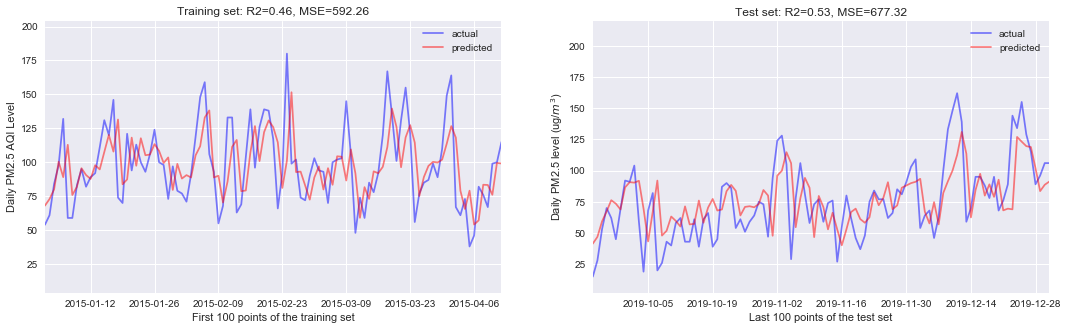

In [94]:
# Ridge model with the new lag feature

# initialize a Ridge model with default parameters
ridge_2 = Pipeline([('scaler', StandardScaler()),('ridge',Ridge())])

# grid search of parameter alpha to improve lasso model
parameters = {'ridge__alpha': np.arange(0.0001, 0.005, 0.0002)}
ridge_2_cv = GridSearchCV(ridge_2, parameters, scoring='r2',cv=3)
ridge_2_cv.fit(X_2_train, y_2_train)
print('Best parameters:', ridge_2_cv.best_params_)
print('Corresponding R2 score:', ridge_2_cv.best_score_)

# update model with the best parameters
ridge_2 = Pipeline([('scaler', StandardScaler()),('ridge', Ridge(alpha=0.0001))])
ridge_2.fit(X_2_train, y_2_train)
pred_train = ridge_2.predict(X_2_train)
pred_test = ridge_2.predict(X_2_test)

# print feature ranking
feature_rank = pd.DataFrame({'feature':X_2_train.columns, 'coefficient':ridge_2.named_steps.ridge.coef_})
print(feature_rank.sort_values('coefficient',ascending=False))

compute_plot_result_2('Ridge', pred_train, pred_test)

### RandomForestRegressor model with the new lag feature

In [95]:
# Initialize a RandomForestRegressor model with default parameters
rfr_2 = Pipeline([('scaler', StandardScaler()),('rfr',RandomForestRegressor())])

# grid search of parameters n_estimators and max_features to improve RandomForestRegressor model
parameters = {'rfr__n_estimators': np.arange(20,80,10), 'rfr__max_features':['auto','sqrt','log2']}
rfr_2_cv = GridSearchCV(rfr_2, parameters, scoring='r2',cv=3)
rfr_2_cv.fit(X_2_train, y_2_train)
print('Best parameters:', rfr_2_cv.best_params_)
print('Corresponding R2 score:', rfr_2_cv.best_score_)

Best parameters: {'rfr__max_features': 'log2', 'rfr__n_estimators': 60}
Corresponding R2 score: 0.4333443291610278


                   feature  importance
8            PM2.5_day_lag    0.500289
6         Wind_Speed_(mph)    0.093264
5             Humidity_(%)    0.091835
3  Average_Temperature_(F)    0.077082
4            Dew_Point_(F)    0.067895
2                      Day    0.059374
1                    Month    0.043751
7            Pressure_(Hg)    0.035461
0                     Year    0.031048


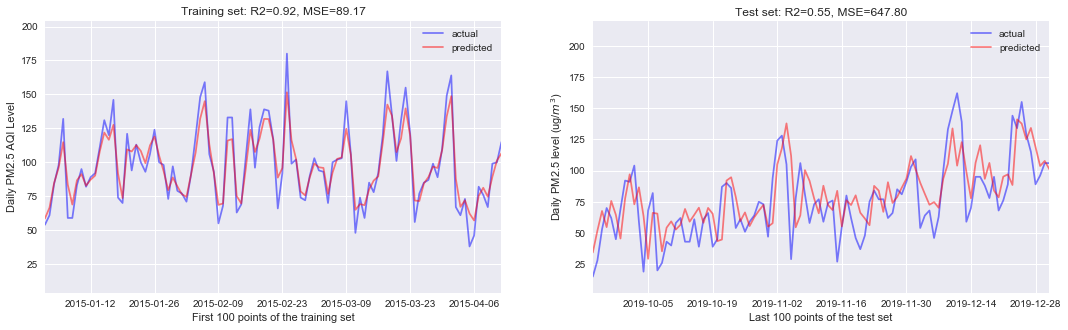

In [96]:
# Update model with best parameters
rfr_2 = Pipeline([('scaler', StandardScaler()),('rfr', RandomForestRegressor(n_estimators=60, max_features='auto', n_jobs=2))])
rfr_2.fit(X_2_train, y_2_train)
pred_train = rfr_2.predict(X_2_train)
pred_test = rfr_2.predict(X_2_test)

# print feature importance
feature_rank = pd.DataFrame({'feature': X_2_train.columns, 'importance': rfr_2.named_steps.rfr.feature_importances_})
print(feature_rank.sort_values(by='importance',ascending=False))

compute_plot_result_2("RandomForestRegressor", pred_train, pred_test)

### GradientBoostingRegressor model with the new lag feature

In [97]:
# Initialize a GradientBoostREgressor model with default parameters
gbr_2 = Pipeline([('scaler', StandardScaler()),('gbr',GradientBoostingRegressor())])

# grid search of parameter n_estimators, max_features, max_depth, learning_rate to improve GradientBoostingRegressor model
parameters = {'gbr__n_estimators': np.arange(30,120,20), 'gbr__learning_rate': [0.01, 0.05, 0.1, 0.15],'gbr__max_features':['auto','sqrt','log2'],'gbr__max_depth': np.arange(2,7,2)}
gbr_2_cv = GridSearchCV(gbr_2, parameters, scoring='r2',cv=3)
gbr_2_cv.fit(X_2_train, y_2_train)
print('Best parameters:', gbr_2_cv.best_params_)
print('Corresponding R2 score:', gbr_2_cv.best_score_)

Best parameters: {'gbr__learning_rate': 0.1, 'gbr__max_depth': 2, 'gbr__max_features': 'sqrt', 'gbr__n_estimators': 70}
Corresponding R2 score: 0.4642463115595706


                   feature  importance
8            PM2.5_day_lag    0.671475
5             Humidity_(%)    0.070356
4            Dew_Point_(F)    0.063055
6         Wind_Speed_(mph)    0.053102
1                    Month    0.050636
3  Average_Temperature_(F)    0.048268
2                      Day    0.018345
7            Pressure_(Hg)    0.013738
0                     Year    0.011025


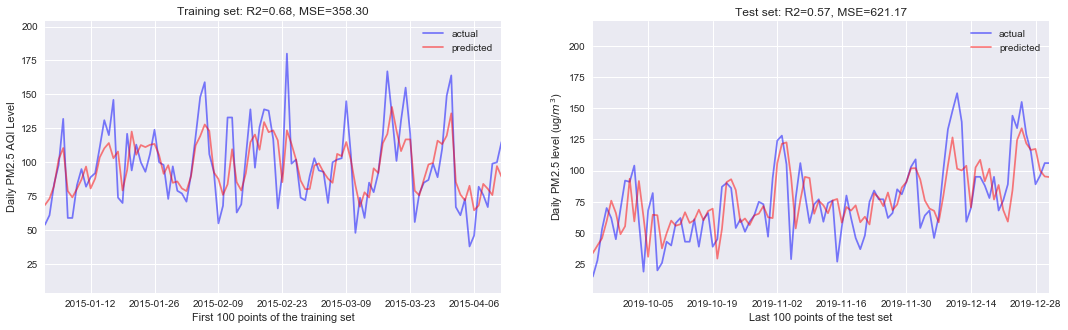

In [98]:
# Update model with best parameters
gbr_2 = Pipeline([('scaler', StandardScaler()),
                  ('gbr', GradientBoostingRegressor(n_estimators=70, learning_rate=0.1, max_features='auto', max_depth=4))])
gbr_2.fit(X_2_train, y_2_train)
pred_train = gbr_2.predict(X_2_train)
pred_test = gbr_2.predict(X_2_test)

# print feature importance
feature_rank = pd.DataFrame({'feature': X_2_train.columns, 'importance': gbr_2.named_steps.gbr.feature_importances_})
print(feature_rank.sort_values(by='importance',ascending=False))

compute_plot_result_2("GradientBoostingRegressor", pred_train, pred_test)

### KneighborsRegressor model with the new lag feature

In [99]:
# Initialize a KNeightborsRegressor model using default parameters
knr_2 = Pipeline([('scaler', StandardScaler()),('knr',KNeighborsRegressor())])

# Grid search of parameters n_neighbors, weights to improve KNeighborsRegressor model
parameters = {'knr__n_neighbors': np.arange(5,50,10),'knr__weights':['distance','uniform']}
knr_2_cv = GridSearchCV(knr_2, parameters, scoring='r2',cv=3)
knr_2_cv.fit(X_2_train, y_2_train)
print('Best parameters:', knr_2_cv.best_params_)
print('Corresponding R2 score:', knr_2_cv.best_score_)

Best parameters: {'knr__n_neighbors': 15, 'knr__weights': 'distance'}
Corresponding R2 score: 0.373152368102881


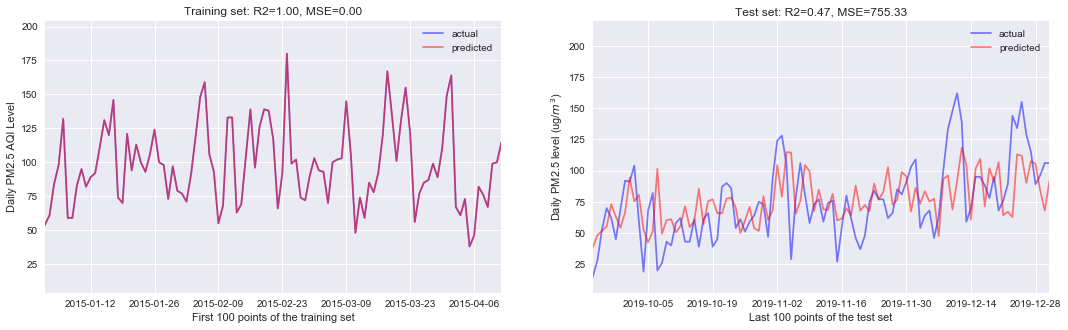

In [100]:
# Update model with the best parameters
knr_2 = Pipeline([('scaler', StandardScaler()),('knr',KNeighborsRegressor(n_neighbors=15, weights='distance'))])
knr_2.fit(X_2_train, y_2_train)
pred_train = knr_2.predict(X_2_train)
pred_test = knr_2.predict(X_2_test)

compute_plot_result_2("KNeighborsRegressor", pred_train, pred_test)

### MLPRegressor model with the new lag feature

In [101]:
# initialize a MLPRegressor model using default parameters
mlpr_2 = Pipeline([(' scaler', StandardScaler()),('mlpr',MLPRegressor())])

# grid search of parameters hidden_layer_sizes, activation to improve MLPRegressor model
parameters = {'mlpr__activation': ['identity','logistic','tanh','relu'],'mlpr__hidden_layer_sizes':[(100,),(100,10),(100,100),(100,100,10)]}
mlpr_2_cv = GridSearchCV(mlpr_2, parameters, scoring='r2',cv=3)
mlpr_2_cv.fit(X_2_train, y_2_train)
print('Best parameters:', mlpr_2_cv.best_params_)
print('Corresponding R2 score:', mlpr_2_cv.best_score_)

Best parameters: {'mlpr__activation': 'identity', 'mlpr__hidden_layer_sizes': (100,)}
Corresponding R2 score: 0.42851529258146087


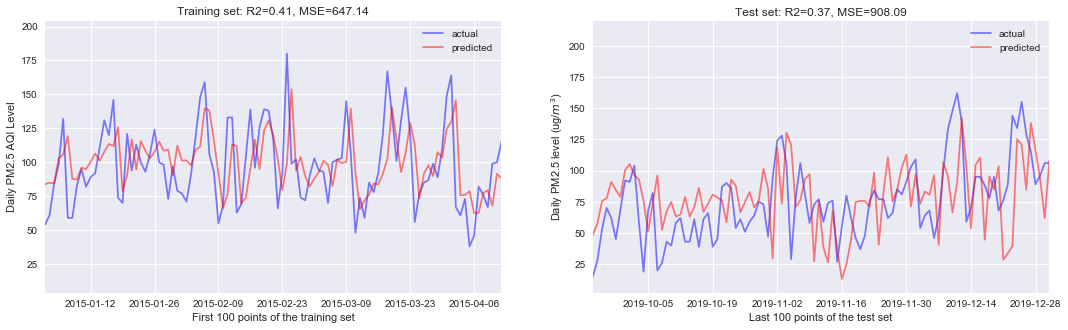

In [102]:
# update model with the best parameters
mlpr_2 = Pipeline([('scaler', StandardScaler()),('mlpr',MLPRegressor(hidden_layer_sizes=(100,), activation='relu'))])
mlpr_2.fit(X_2_train, y_2_train)
pred_train = mlpr_2.predict(X_2_train)
pred_test = mlpr_2.predict(X_2_test)

compute_plot_result_2("MLPRegressor", pred_train, pred_test)

### Model comparison

In [103]:
print(score_table_2)

                           r2_train   r2_test mse_train mse_test
LinearRegression           0.464424  0.528959   592.258   677.32
Lasso                      0.461513  0.536584   595.478  666.356
Ridge                      0.464424   0.52896   592.258   677.32
RandomForestRegressor      0.919366   0.54949    89.168  647.799
GradientBoostingRegressor  0.675996  0.568007   358.295  621.173
KNeighborsRegressor               1  0.474705         0  755.334
MLPRegressor                0.41479  0.368472   647.145  908.088


### Section Summary 

* The previous machine learning models are updated with the new lag feature.
* The results reveal that, in this particular problem, it’s useful to include the lag feature from previous steps for predicting future steps and R2 scores are boosted regardless of the model used. Simple linear models report an imporved $R^2$ score of 0.53 on the test set, and more advanced models all showed improved $R^2$ scores.
* The results from these machine learning models reveal that among all features, the newly added lag feature accounts for about most of the contribution than climactic features and the datetime based features.